<p style="background-color:gray">Generative approach to classification (based on probability distributions)</p>

In [148]:
#2.1
#fit an elapse shape distribution to - and another to +
#for a new input, we calculate the probability of it being an element of either of the elapses

In [149]:
#We would have the probability of each distribution, pi 1,pi2,...
#and then the distribution of each Pi(x) (P1(x),P2(x),P3(x),...)

Overll joint distribution
<p style="color:navy">Pr(x,y) = Pr(y)*Pr(x|y) = pi(y)*Pry(x)</p>

In [150]:
#2.2
#probability review

In [151]:
#2.3
#winary dataset using single variables
#winary1 : 43 bottles
#winary2 : 51 bottles
#winary3 : 36 bottles
#In order to classify a new bottle, we need to fit a distribution to each of them 

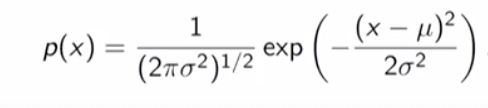

In [157]:
#The gaussian(normal) N(mu, sigma2(variance))'s density function:
from IPython.display import Image
Image("gaussian_density.png")

In [171]:
data = np.loadtxt('wine.data.txt', delimiter=',')
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [172]:
data

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [196]:
import pandas as pd
dataframe = pd.DataFrame(data , columns = ['label'] + features)
dataframe.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [197]:
dataframe.shape

(178, 14)

In [207]:
#omitting all of the columns but alcohol
alcohol = dataframe[['label','Alcohol']]
#alchohol

In [208]:
winary_one = alcohol[alcohol['label'] == 1]
winary_two = alcohol[alcohol['label'] == 2]
winary_three = alcohol[alcohol['label'] == 3]

In [212]:
#Calculating the normal parameters for each of the winaries (Alchohol feature)
mu_one = np.mean(winary_one['Alcohol'])
mu_two = np.mean(winary_two['Alcohol'])
mu_three = np.mean(winary_three['Alcohol'])
var_one = np.var(winary_one['Alcohol'])
var_two = np.var(winary_two['Alcohol'])
var_three = np.var(winary_three['Alcohol'])

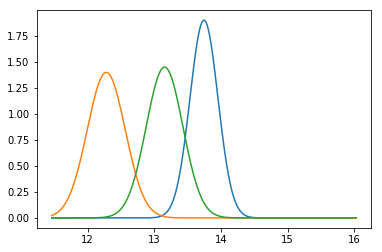

In [221]:
#Plotting a gaussian (normal) distribution, using mu and variance
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


x = np.linspace(max(mu_one, mu_two, mu_three) - 8*max(var_one, var_two, var_three), max(mu_one, mu_two, mu_three) + 8*max(var_one, var_two, var_three), 400)
plt.plot(x, stats.norm.pdf(x, mu_one, var_one))
plt.plot(x, stats.norm.pdf(x, mu_two, var_two))
plt.plot(x, stats.norm.pdf(x, mu_three, var_three))
plt.show()

In [252]:
#plotting normal distribution manually
import math
y = []
def normal(mu, var):
    x = np.arange(-10,50, 0.5)
    for i in x:
        y.append(1/ math.sqrt(2*math.pi*var)*math.pow(math.e, (-(i-mu)**2/(2*var))))
    plt.plot(x,y)

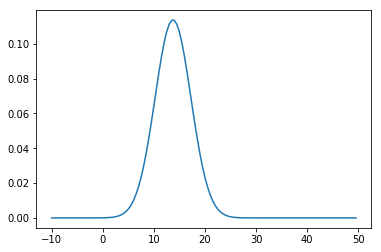

In [253]:
normal(mu_one, mu_two)

In [254]:
#distributions have a great overlap, so alcohol can not be a distinguishing variable

In [297]:
#classifying a new bottle of wine
def px(i):
    Pi_one = 1/ math.sqrt(2*math.pi*var_one)*math.pow(math.e, (-(i-mu_one)**2/(2*var_one)))
    Pi_two = 1/ math.sqrt(2*math.pi*var_two)*math.pow(math.e, (-(i-mu_two)**2/(2*var_two)))
    Pi_three = 1/ math.sqrt(2*math.pi*var_three)*math.pow(math.e, (-(i-mu_three)**2/(2*var_three)))
    Pi_prob_one = Pi_one*len(winary_one)/len(dataframe)
    Pi_prob_two = Pi_one*len(winary_two)/len(dataframe)
    Pi_prob_three = Pi_one*len(winary_three)/len(dataframe)
    return Pi_prob_one,Pi_prob_two, Pi_prob_three

In [304]:
px(14.13)

(0.20266479156190167, 0.2438847491677122, 0.16487983042324206)

In [303]:
dataframe.tail()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,3.0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0
